# Sesi 1

## 1. Data Preparation

In [63]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('dataset/3. Loan Approval.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [66]:
numbers = df.select_dtypes(include=['number']).drop(columns=['loan_status']).columns
categories = df.select_dtypes(exclude = ['number']).columns

In [67]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [68]:
round(df.describe(),2)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00
mean,27.76,80319.05,5.41,9583.16,11.01,0.14,5.87,632.61,0.22
std,6.05,80422.50,6.06,6314.89,2.98,0.09,3.88,50.44,0.42
min,20.00,8000.00,0.00,500.00,5.42,0.00,2.00,390.00,0.00
25%,24.00,47204.00,1.00,5000.00,8.59,0.07,3.00,601.00,0.00
50%,26.00,67048.00,4.00,8000.00,11.01,0.12,4.00,640.00,0.00
75%,30.00,95789.25,8.00,12237.25,12.99,0.19,8.00,670.00,0.00
max,144.00,7200766.00,125.00,35000.00,20.00,0.66,30.00,850.00,1.00


In [69]:
df[categories].describe(include='all')

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


In [70]:
numbers

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score'],
      dtype='object')

In [71]:
categories

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

In [72]:
df.duplicated().sum()

np.int64(0)

In [73]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

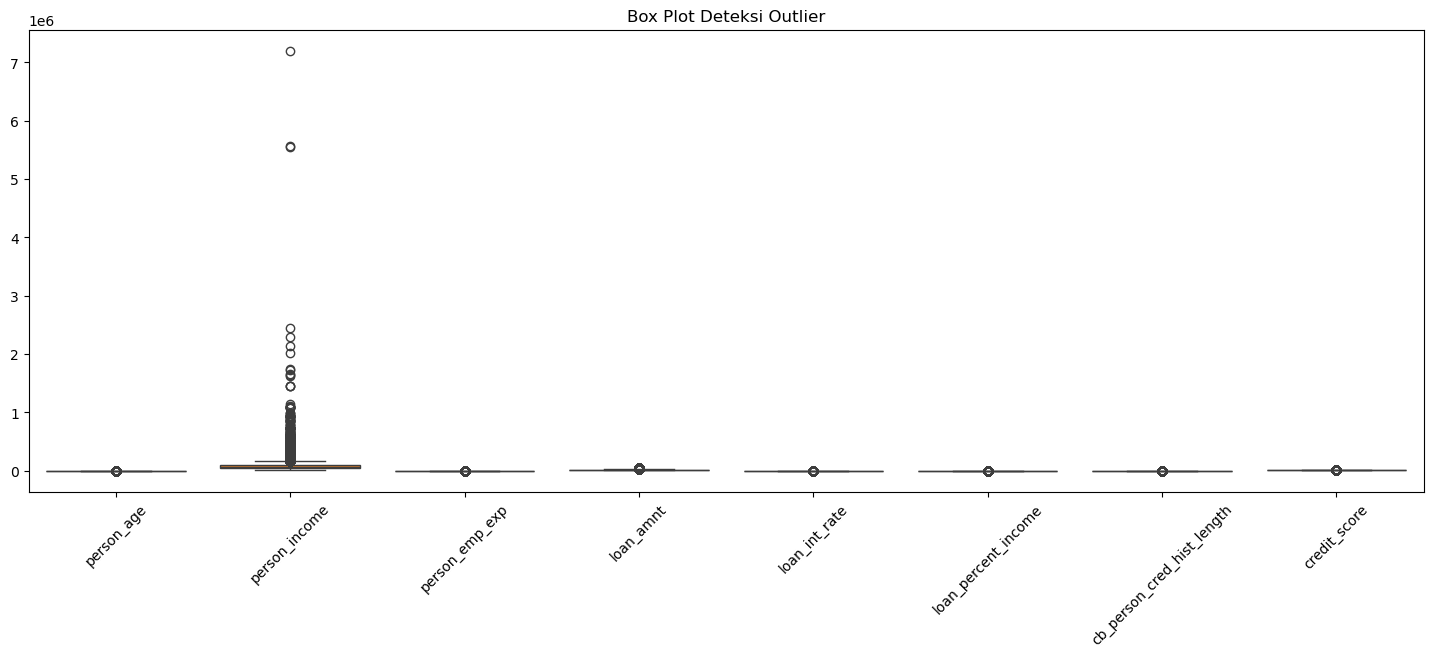

In [75]:
#Deteksi Outlier
plt.figure(figsize=(18,6))
sns.boxplot(data=df[numbers])
plt.title('Box Plot Deteksi Outlier')
plt.xticks(rotation=45)
plt.show()

In [76]:
Q1 = df[numbers].quantile(0.25)
Q3 = df[numbers].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Data Sebelum: ', df.shape[0], 'baris')

df = df[~((df[numbers] < lower_bound) | (df[numbers] > upper_bound)).any(axis=1)]

print('Data Sesudah: ', df.shape[0], 'baris')

Data Sebelum:  45000 baris
Data Sesudah:  37549 baris


In [77]:
#Konversi Kolom Target dari Kategorik menjadi Numerik(encoded)
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].replace({'Yes': 1, 'No': 0})

#Membaca ulang kolom kategorik
categories = df.select_dtypes(exclude = ['number']).columns

In [78]:
categories

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent'],
      dtype='object')

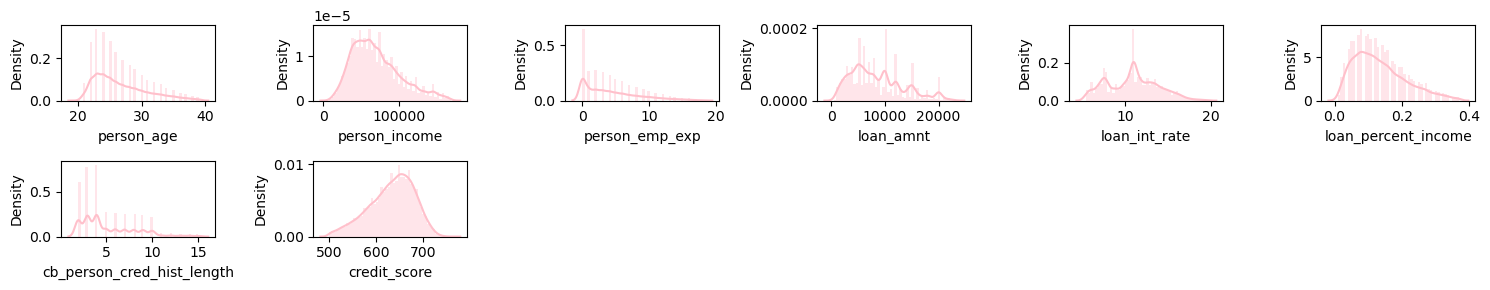

In [79]:
plt.figure(figsize=(15,3))
for i in range (0, len(numbers)):
    plt.subplot(math.ceil(len(numbers)/6), 6, i+1)
    sns.distplot(df[numbers[i]], color='pink')
    plt.tight_layout()

<Axes: >

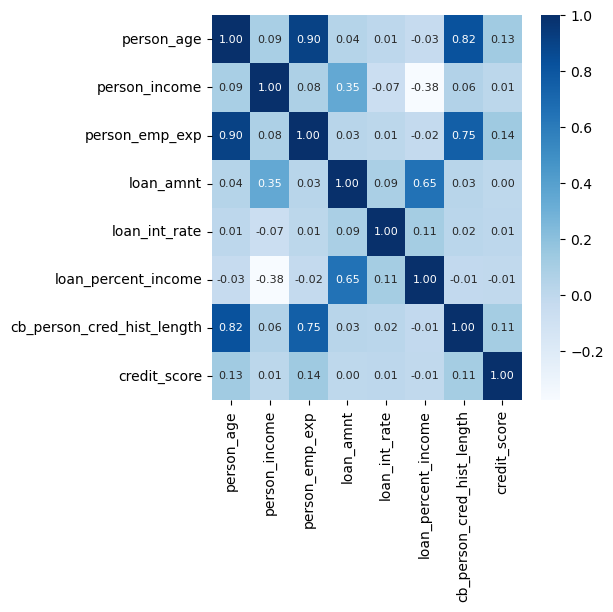

In [80]:
plt.figure(figsize=(5,5))
sns.heatmap(df[numbers].corr(), cmap='Blues', annot=True, fmt='.2f', annot_kws={'size': 8})

In [81]:
df= df.drop(columns=['person_age'])
df.head()

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,1,0
5,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,0,1
9,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,0,1
11,female,Associate,13113.0,0,OWN,4500.0,HOMEIMPROVEMENT,8.63,0.34,2.0,651,0,1
19,female,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2.0,679,0,1


In [82]:
numbers = df.select_dtypes(include=['number']).drop(columns=['loan_status']).columns

In [83]:
numbers

Index(['person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file'],
      dtype='object')

In [84]:
df_select = df.copy()
df_select.head()

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,1,0
5,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,0,1
9,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,0,1
11,female,Associate,13113.0,0,OWN,4500.0,HOMEIMPROVEMENT,8.63,0.34,2.0,651,0,1
19,female,Master,14283.0,1,MORTGAGE,1750.0,EDUCATION,10.99,0.12,2.0,679,0,1


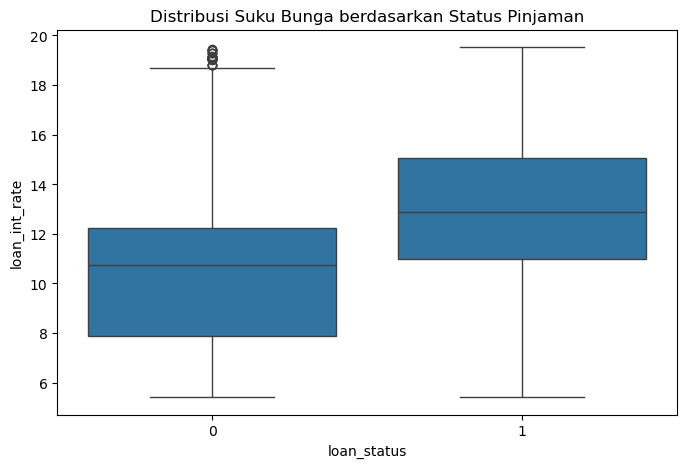

<Figure size 1000x600 with 0 Axes>

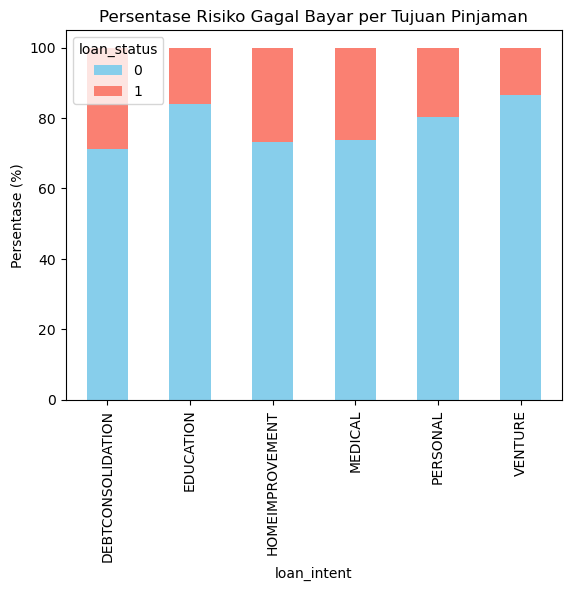

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Boxplot Bunga vs Status
plt.figure(figsize=(8,5))
sns.boxplot(x='loan_status', y='loan_int_rate', data=df)
plt.title('Distribusi Suku Bunga berdasarkan Status Pinjaman')
plt.show()

# 2. Persentase Gagal Bayar per Tujuan Pinjaman
plt.figure(figsize=(10,6))
intent_risk = pd.crosstab(df['loan_intent'], df['loan_status'], normalize='index') * 100
intent_risk.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Persentase Risiko Gagal Bayar per Tujuan Pinjaman')
plt.ylabel('Persentase (%)')
plt.show()

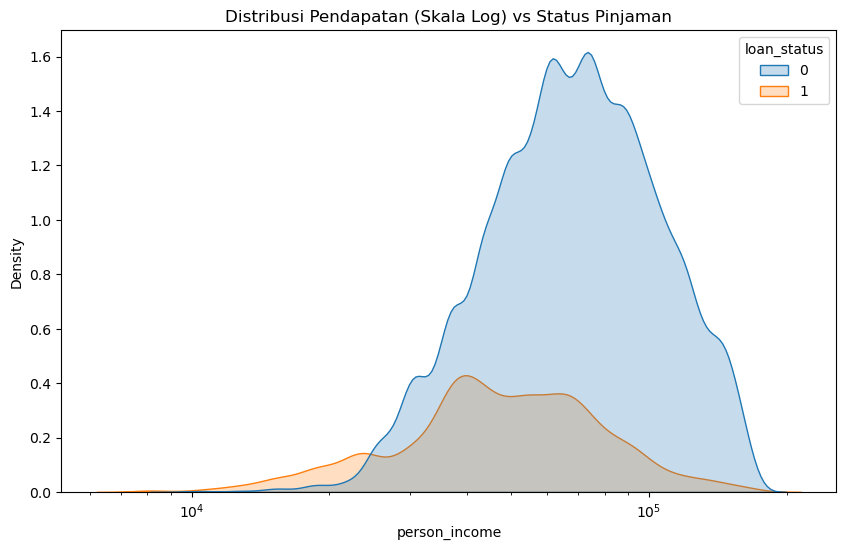

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Analisis Pendapatan (Log Scale) terhadap Status Pinjaman
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_select, x='person_income', hue='loan_status', fill=True, log_scale=True)
plt.title('Distribusi Pendapatan (Skala Log) vs Status Pinjaman')
plt.show()

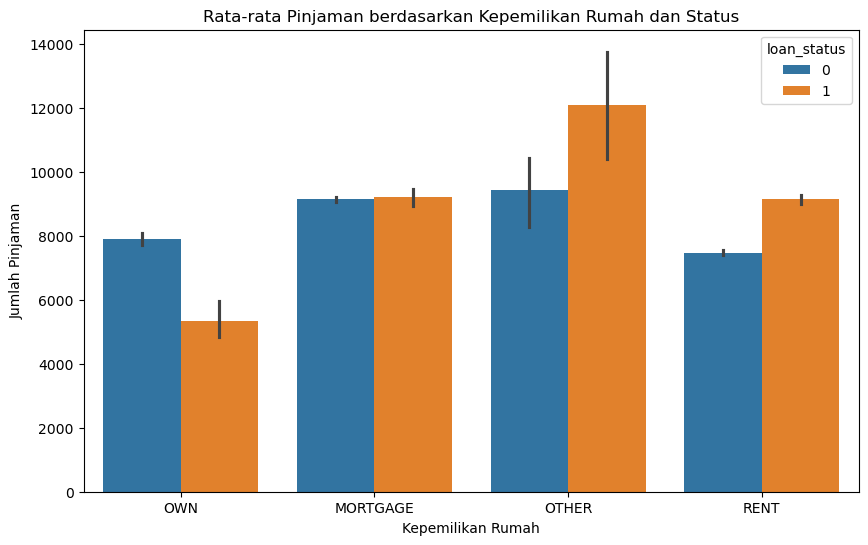

In [125]:
# 2. Hubungan Kepemilikan Rumah dengan Jumlah Pinjaman
plt.figure(figsize=(10, 6))
sns.barplot(x='person_home_ownership', y='loan_amnt', hue='loan_status', data=df_select)
# Using the original column name instead of the one-hot encoded version
plt.title('Rata-rata Pinjaman berdasarkan Kepemilikan Rumah dan Status')
plt.xlabel('Kepemilikan Rumah')
plt.ylabel('Jumlah Pinjaman')
plt.show()

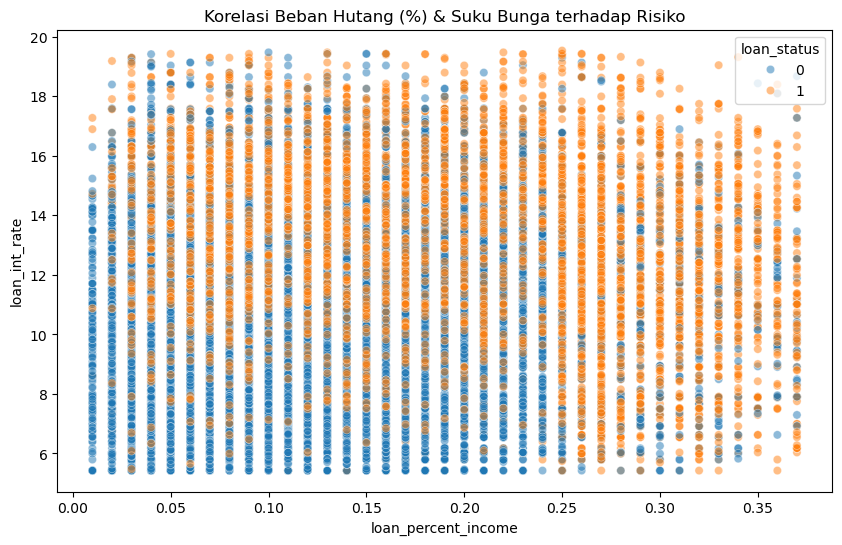

In [126]:
# 3. Scatter Plot: Loan Percent Income vs Interest Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_select, x='loan_percent_income', y='loan_int_rate', hue='loan_status', alpha=0.5)
plt.title('Korelasi Beban Hutang (%) & Suku Bunga terhadap Risiko')
plt.show()

In [30]:
#Normalisasikan kolom numerik dengan MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
for col in numbers:
    df_select[col] = MinMaxScaler().fit_transform(df_select[col].values.reshape(len(df_select), 1))

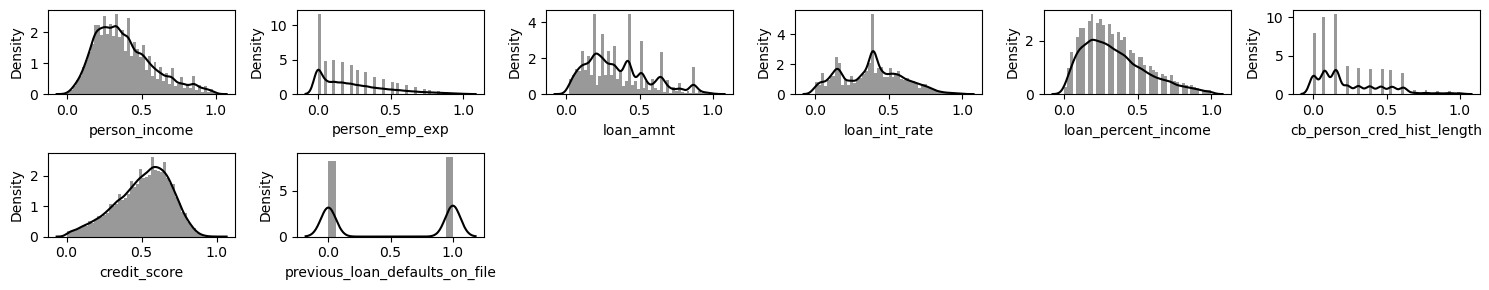

In [31]:
#Visualisasi Hasil Normalisasi dengan Density Plot
plt.figure(figsize=(15,3))
for i in range (0, len(numbers)):
    plt.subplot(math.ceil(len(numbers)/6), 6, i+1)
    sns.distplot(df_select[numbers[i]], color='black')
    plt.tight_layout()

In [33]:
df_select.head()

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,female,High School,0.026657,0.000000,OWN,0.022222,EDUCATION,0.405386,0.194444,0.000000,0.022727,1.0,0
5,female,High School,0.030822,0.000000,OWN,0.088889,VENTURE,0.121899,0.500000,0.000000,0.128788,0.0,1
9,female,High School,0.029502,0.000000,OWN,0.048889,VENTURE,0.660524,0.333333,0.076923,0.537879,0.0,1
11,female,Associate,0.031830,0.000000,OWN,0.177778,HOMEIMPROVEMENT,0.227498,0.916667,0.000000,0.579545,0.0,1
19,female,Master,0.039114,0.055556,MORTGAGE,0.055556,EDUCATION,0.394755,0.305556,0.000000,0.685606,0.0,1


In [34]:
#one-Hot encoding
df_select = pd.get_dummies(df_select, columns=categories)
df_select.head()

,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_gender_female,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,0.026657,0.000000,0.022222,0.405386,0.194444,0.000000,0.022727,1.0,0,True,...,False,False,True,False,False,True,False,False,False,False
5,0.030822,0.000000,0.088889,0.121899,0.500000,0.000000,0.128788,0.0,1,True,...,False,False,True,False,False,False,False,False,False,True
9,0.029502,0.000000,0.048889,0.660524,0.333333,0.076923,0.537879,0.0,1,True,...,False,False,True,False,False,False,False,False,False,True
11,0.031830,0.000000,0.177778,0.227498,0.916667,0.000000,0.579545,0.0,1,True,...,False,False,True,False,False,False,True,False,False,False
19,0.039114,0.055556,0.055556,0.394755,0.305556,0.000000,0.685606,0.0,1,True,...,True,False,False,False,False,True,False,False,False,False


In [35]:
x = df_select.drop('loan_status', axis=1)
y = df_select['loan_status']

### Handle Class Imbalance

In [36]:
#Handle Class Imbalance
y.value_counts()

loan_status
0    29562
1     7987
Name: count, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

#Membagi data menjadi 80% untuk training dan 20% untuk testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Hasil split
print('Jumlah data train:', len(x_train))
print('Jumlah data test:', len(x_test))

Jumlah data train: 30039
Jumlah data test: 7510


In [39]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

x_train_balance, y_train_balance = sm.fit_resample(x_train, y_train)

In [61]:
print('Jumlah data train:', len(x_train_balance))
print('Jumlah data test:', len(y_train_balance))

Jumlah data train: 47338
Jumlah data test: 47338


### Tuning Hyperparameter

In [103]:
from sklearn.model_selection import RandomizedSearchCV

model_knn = KNeighborsClassifier()
param_dist = {
    'n_neighbors': range(1, 51),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
search = RandomizedSearchCV(model_knn, param_dist, n_iter=30, cv=5, scoring='accuracy')
search.fit(x_train_balance, y_train_balance)

print('Best params:', search.best_params_)

Best params: {'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan'}


# Sesi 2

### KNN

In [122]:
from sklearn.neighbors import KNeighborsClassifier

#Inisiasi model KNN
model_knn = KNeighborsClassifier(n_neighbors=4)

#Train model
model_knn.fit(x_train_balance, y_train_balance)

#Prediksi menggunakan data test
y_pred_knn = model_knn.predict(x_test)

train_accuracy_knn = model_knn.score(x_train_balance, y_train_balance)
print("Train Accuracy:", train_accuracy_knn)

Train Accuracy: 0.9600743588660273


### Modelling Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Inisiasi model Logistic Regression
model_logreg = LogisticRegression()

#Train model
model_logreg.fit(x_train_balance, y_train_balance)

#Prediksi menggunakan data test
y_pred_logreg = model_logreg.predict(x_test)

train_accuracy_logreg = model_logreg.score(x_train_balance, y_train_balance)
print("Train Accuracy:", train_accuracy_logreg)

Train Accuracy: 0.8876378385229625


### Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier

#Inisiasi model Logistic Regression
model_dt = DecisionTreeClassifier()

#Train model
model_dt.fit(x_train_balance, y_train_balance)

#Prediksi menggunakan data test
y_pred_dt = model_dt.predict(x_test)

train_accuracy_dt = model_dt.score(x_train_balance, y_train_balance)
print("Train Accuracy:", train_accuracy_dt)

Train Accuracy: 1.0


### Random Tree

In [107]:
from sklearn.ensemble import RandomForestClassifier

#Inisiasi model Logistic Regression
model_rf = RandomForestClassifier()

#Train model
model_rf.fit(x_train_balance, y_train_balance)

#Prediksi menggunakan data test
y_pred_rf = model_rf.predict(x_test)

train_accuracy_rf = model_rf.score(x_train_balance, y_train_balance)
print("Train Accuracy:", train_accuracy_rf)

Train Accuracy: 1.0


### Support Vector Machine

In [108]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(x_train_balance, y_train_balance)
y_pred_svm = model_svm.predict(x_test)
train_accuracy_svm = model_svm.score(x_train_balance, y_train_balance)
print("Train Accuracy:", train_accuracy_svm)

Train Accuracy: 0.903523596265157


### Naive-Bayes

In [109]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(x_train_balance, y_train_balance)
y_pred_nb = model_nb.predict(x_test)
train_accuracy_nb = model_nb.score(x_train_balance, y_train_balance)
print("Train Accuracy:", train_accuracy_nb)

Train Accuracy: 0.830220964130297


## Modelin

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [111]:
y_pred_logreg = model_logreg.predict(x_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

roc_auc_logreg = roc_auc_score(y_test, model_logreg.predict_proba(x_test)[:, 1])

In [112]:
y_pred_dt = model_dt.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

roc_auc_dt = roc_auc_score(y_test, model_dt.predict_proba(x_test)[:, 1])

In [113]:
y_pred_rf = model_rf.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

roc_auc_rf = roc_auc_score(y_test, model_rf.predict_proba(x_test)[:, 1])

In [114]:
y_pred_svm = model_svm.predict(x_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

In [115]:
y_pred_knn = model_knn.predict(x_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

roc_auc_knn = roc_auc_score(y_test, model_knn.predict_proba(x_test)[:, 1])

In [116]:
y_pred_nb = model_nb.predict(x_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, model_nb.predict_proba(x_test)[:, 1])

In [117]:
df_evaluasi = pd.DataFrame({  # Fixed typo: DafaFrame -> DataFrame
    'Model' : ['Logistic Regression', 'Decision Tree', 'Random Forest',
              'Support Vector Machine', 'K-Nearest Neighboor', 
              'Naive-Bayes'],
    'Akurasi' : [accuracy_logreg,accuracy_dt,accuracy_rf,
                 accuracy_svm,accuracy_knn,accuracy_nb],
    'Precision' : [precision_logreg,precision_dt,precision_rf,
                  precision_svm,precision_knn,precision_nb],  # Note: there might be a typo in 'presicion_svm'
    'Recall' : [recall_logreg,recall_dt,recall_rf,recall_svm,
               recall_knn,recall_nb],  # Note: there might be a typo in 'reval_nb'
    'F1 Score' : [f1_logreg,f1_dt,f1_rf,f1_svm,
                 f1_knn,f1_nb]
})
df_evaluasi.round(3)

,Model,Akurasi,Precision,Recall,F1 Score
0,Logistic Regression,0.863,0.624,0.914,0.741
1,Decision Tree,0.881,0.699,0.791,0.742
2,Random Forest,0.913,0.773,0.843,0.807
3,Support Vector Machine,0.863,0.623,0.923,0.744
4,K-Nearest Neighboor,0.869,0.665,0.788,0.721
5,Naive-Bayes,0.752,0.464,0.979,0.630


In [118]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_nb = confusion_matrix(y_test, y_pred_nb)

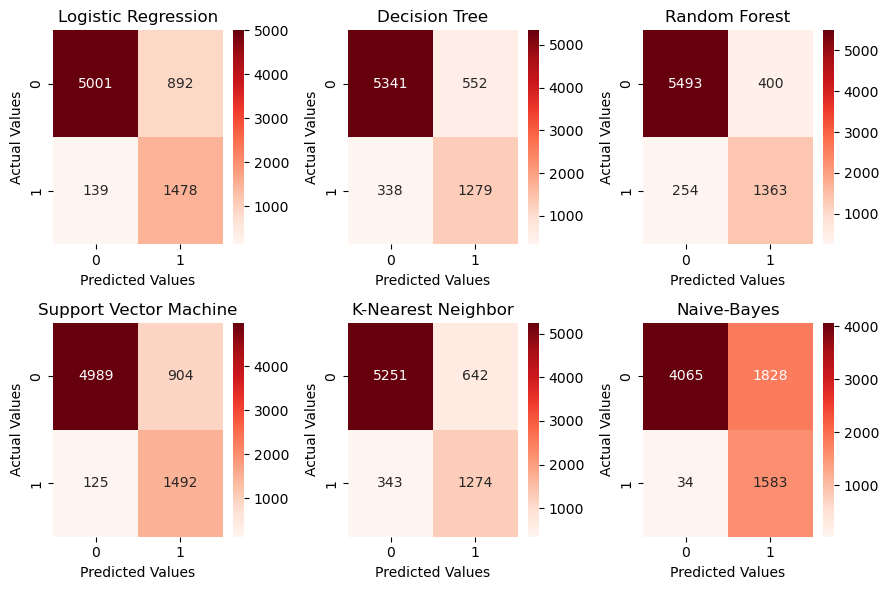

In [119]:
cm_list = [cm_logreg,cm_dt, cm_rf, cm_svm, cm_knn, cm_nb]
model_names =['Logistic Regression', 'Decision Tree', 'Random Forest', 
               'Support Vector Machine', 'K-Nearest Neighbor', 
               'Naive-Bayes']
fig, axes = plt.subplots(2, 3, figsize=(9, 6))
for i in range(len(cm_list)):
    row = i // 3
    col = i % 3
    sns.heatmap(cm_list[i], annot=True, cmap='Reds', fmt='g', ax=axes[row, col])
    axes[row, col].set_title(model_names[i])
    axes[row, col].set_ylabel('Actual Values')
    axes[row, col].set_xlabel('Predicted Values')
plt.tight_layout()
plt.show()

In [102]:
df.shape

(37549, 13)